# **Implement Logistic Regression on the dataset**

**Recession Prediction**



**Team :** transformers-stock-market-prediction



**Team Members:**



Anand Muralidhara




Amrutha Singh Balaji Singh




Poorva Agarwal




Snehal Yeole



**Individual Contributions:**


1. Data Cleaning, Data pre-processing and Sigmoid function - **Anand Muralidhara (013752622)**


2. Exploratory Data Analysis to choose attribute/feature for Logistic Regression implementation - **Snehal Yeole (012548471)**


3. Implement Logistic Regression on selected attribute - **Amrutha Singh Balaji Singh (013778583)**


4. Performance Evaluation and Visualization of the model - **Poorva Agarwal (013770939)**





**Data Set Used:**


quarterly-nasdaq-gdp-unemp-ind-yield.csv


The dataset can be found on the common google drive under **“transformers-stock-market-prediction”** folder.


Below is the link:



https://drive.google.com/drive/u/1/folders/1qgsOPA2svJ-58u5zurF1NScUPu9ZJSEP


**DATA NARRATIVE**



**Use Case:**



* Predict the bubble formation and upcoming Recession based on factors that are major players leading to Recession



*  Retrieve the insights from the Recession dataset on market growth trend. How the market is doing? which will help people channelize their investments



**Purpose of this assignment:**



The purpose of this assignment is Logisitic Regression implementation on 'YIELD' attribute for Binary classification of target variable 'RECESSION'. The resulting outcome of classification will be either '0' or '1'


**Assignment description:**


This assignment has 4 parts:


**PART A:** 

Add Sigmoid function to Linear Regression. 

Sigmoid function takes equation in the form "y = mx + b" from Linear Regression


**PART B:** 


Exploratory Data Analysis to choose attribute/feature for Logistic Regression implementation


Exploratory Data Analysis is performed on the entire dataset to identify the independent variables (features) that have direct and clear impact on our dependent variable (target) - RECESSION. Linear Regression is applied for this purpose


**PART C:** 


Implement Logistic Regression on selected attribute

Logistic Regression is applied on the 'YIELD' attribute 


**PART D:** 


Performance Evaluation and Visualization of the model



**Feature and Target Selection:**

In order to implement Logistic Regression on our 'Recession' dataset, we have split the columns in dataset into two categories:



1.   **Independent Variable (Feature) :** 'YIELD'


2.   **Dependent Variable (Target) :**  'RECESSION'



**Observations:**




*   Visualization of **Sigmoid** function that takes equation "y = mx + b" from Linear Regression


*   Visualization from the Bar graph shows that most of the time the average value of 'RECESSION' factor is 0 - **Recession will not happen**


*   **Exploratory Data Analysis**

    For a unit decrease in “YIELD”, there is an increase of 1.02 units in  the value of RECESSION factor. Similarly, a unit decrease in “GDP“ results in an increase of 1.49 units in the value of RECESSION factor. We can see that the rest of the features have very little impact on the probability of upcoming RECESSION. Thus, **'YIELD'** is used as an attribute for Logistic Regression



*   **Classification observation**
    
    The inverted YIELD curve i.e; The yield on long term investment (10 year) is lower than the yield on short term inverstment (2 year) depicts a classical signal of a looming recession. Yield curve inversions typically precede recessions. We are trying to predict the binary classification of RECESSION factor. In such cases, the 'RECESSION' factor will fall under the classification of binary value '1' (probability of recession)

    
    
*   Accuracy score for Logistic Regression model is 85.29%



*   Visualization of Confusion matrix and Heat map




**Code snippet to mount the google drive on colab**

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Mention the location of your dataset on google drive**

In [40]:
cd '/content/drive/My Drive/DataSets'

/content/drive/My Drive/DataSets


**Import required libraries**

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Code to load the recession dataset csv file and print the first few records**

In [42]:
data_records = pd.read_csv("/content/drive/My Drive/DataSets/quarterly-nasdaq-gdp-unemp-ind-yield.csv", sep=',', usecols=['DATE','NASDAQ','UNEMPLOY','YIELD','GDP','INDUSTRY','RECESSION'])
data_records.head()

,DATE,NASDAQ,UNEMPLOY,YIELD,GDP,INDUSTRY,RECESSION
0,10/1/77,101.216508,6654.666667,-69.00365,301.148,3.287300,0
1,1/1/78,102.436452,6381.333333,-64.99132,250.297,2.183100,0
2,4/1/78,117.489531,6111.666667,-74.26246,376.704,2.710667,0
3,7/1/78,130.087143,6171.333333,-97.95441,330.983,2.632567,0
4,10/1/78,119.848413,6084.000000,-211.76856,420.103,3.244300,0


**Print entire records from recession dataset**

In [43]:
data_records

,DATE,NASDAQ,UNEMPLOY,YIELD,GDP,INDUSTRY,RECESSION
0,10/1/77,101.216508,6654.666667,-69.00365,301.148,3.287300,0
1,1/1/78,102.436452,6381.333333,-64.99132,250.297,2.183100,0
2,4/1/78,117.489531,6111.666667,-74.26246,376.704,2.710667,0
3,7/1/78,130.087143,6171.333333,-97.95441,330.983,2.632567,0
4,10/1/78,119.848413,6084.000000,-211.76856,420.103,3.244300,0
5,1/1/79,125.492064,6130.333333,-247.49419,412.063,3.607767,0
6,4/1/79,133.444603,5956.000000,-248.25242,174.673,1.493500,1
7,7/1/79,144.743333,6168.666667,-2720.95238,158.703,0.894100,1
8,10/1/79,142.523750,6286.333333,120.02580,86.448,0.164133,1
9,1/1/80,152.525238,6704.666667,85.76788,95.787,0.155167,1


**Data Cleaning and Data Preprocessing step**

In [0]:

#Import required library
from sklearn.preprocessing import MinMaxScaler

#Scale the values of NASDAQ, UNEMPLOY, YIELD, GDP and INDUSTRY factors

#Scale the NASDAQ values
scaler = MinMaxScaler()
scaler.fit(data_records.NASDAQ.values.reshape(-1,1))
data_records.NASDAQ = scaler.transform(data_records.NASDAQ.values.reshape(-1,1))

#Scale the UNEMPLOY values
scaler = MinMaxScaler()
scaler.fit(data_records.UNEMPLOY.values.reshape(-1,1))
data_records.UNEMPLOY = scaler.transform(data_records.UNEMPLOY.values.reshape(-1,1))

#Scale the YIELD values
scaler = MinMaxScaler()
scaler.fit(data_records.YIELD.values.reshape(-1,1))
data_records.YIELD = scaler.transform(data_records.YIELD.values.reshape(-1,1))

#Scale the GDP values
scaler = MinMaxScaler()
scaler.fit(data_records.GDP.values.reshape(-1,1))
data_records.GDP = scaler.transform(data_records.GDP.values.reshape(-1,1))

#Scale the INDUSTRY values
scaler = MinMaxScaler()
scaler.fit(data_records.INDUSTRY.values.reshape(-1,1))
data_records.INDUSTRY = scaler.transform(data_records.INDUSTRY.values.reshape(-1,1))

**Print the dataset after Data Cleaning step - scaling the values of features**

In [45]:
data_records

,DATE,NASDAQ,UNEMPLOY,YIELD,GDP,INDUSTRY,RECESSION
0,10/1/77,0.000000,0.109383,0.436097,0.718043,0.849316,0
1,1/1/78,0.000157,0.080972,0.436757,0.678327,0.799668,0
2,4/1/78,0.002093,0.052942,0.435232,0.777056,0.823389,0
3,7/1/78,0.003713,0.059144,0.431336,0.741346,0.819877,0
4,10/1/78,0.002396,0.050066,0.412620,0.810952,0.847382,0
5,1/1/79,0.003122,0.054882,0.406745,0.804673,0.863725,0
6,4/1/79,0.004145,0.036761,0.406621,0.619261,0.768661,1
7,7/1/79,0.005598,0.058866,0.000000,0.606788,0.741711,1
8,10/1/79,0.005313,0.071097,0.467182,0.550353,0.708889,1
9,1/1/80,0.006599,0.114580,0.461548,0.557648,0.708486,1


**Import required libraries for Linear Regression**

In [0]:
import seaborn as seabornInstance  
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## **PART A**

## **Add Sigmoid function to Linear Regression**

**Step 1:** Split the feature and target variable into Training and Test sets

In [0]:
#GDP is selected as a feature and RECESSION as the target variable to add Sigmoid function from Linear Regression
X = data_records[['GDP']]
y = data_records[['RECESSION']]

#Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

#Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

**Step 2:** Train the Linear Regression model

In [48]:
#Setup the model
clf = LinearRegression()

#Use fit function
clf.fit(X_train, y_train)

#Check the score
sc = clf.score(X_test, y_test)
sc

0.22417650480017715

**Step 3:** Plot the Sigmoid function

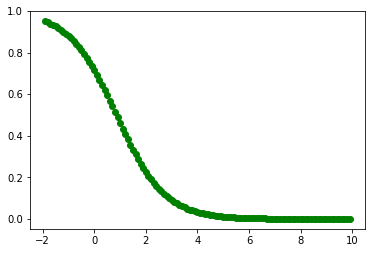

In [49]:
# Plotting sigmoid function 
import numpy as np
from matplotlib import pyplot as plt
def model(clf,X_train):
    return 1/(1 + np.exp(-(clf.intercept_+clf.coef_*X_train)))  #Sigmoid function takes equation in the form "y = mx + b" from Linear Regression
for i in range(1,120,1):
    plt.plot(i/10.0-2,model(clf,i/10.0-2),'ro',color='green')


## **PART B**

## **Exploratory Data Analysis to choose attribute/feature for Logistic Regression implementation**

We are performing exploratory data analysis in order to figure out which independent variables (features) have direct and clear impact on our dependent variable - RECESSION. Logistic Regression will be applied on those feature(s)


In order to do this, we will apply Linear Regression on the entire dataset first

**Step 1:** Print the shape of dataset

In [50]:
data_records.shape

(167, 7)

**Step 2:** Retrieve the statistical details

In [51]:
data_records.describe()

,NASDAQ,UNEMPLOY,YIELD,GDP,INDUSTRY,RECESSION
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,0.231932,0.288809,0.444050,0.720749,0.767765,0.155689
std,0.240141,0.234824,0.084117,0.167890,0.147301,0.363650
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.036747,0.118530,0.435083,0.664302,0.711495,0.000000
50%,0.182717,0.243296,0.442720,0.740384,0.797722,0.000000
75%,0.318428,0.349179,0.451624,0.835757,0.857632,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Step 3:** Divide the data into "attributes" and "labels". X variable contains all the attributes/features and y variable contains labels

In [0]:
X = data_records[['NASDAQ', 'UNEMPLOY', 'YIELD', 'GDP', 'INDUSTRY']]
y = data_records['RECESSION']

**Step 4:** Check the average value of "RECESSION" column

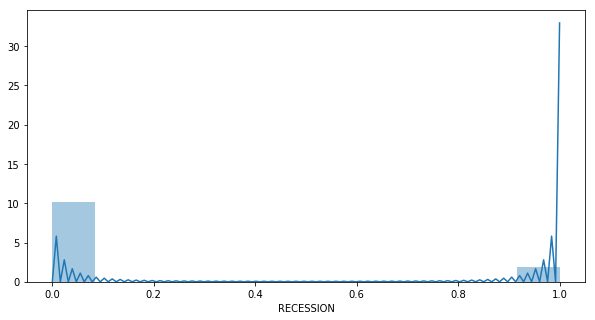

In [53]:
plt.figure(figsize=(10,5))
plt.tight_layout()
seabornInstance.distplot(data_records['RECESSION'])

As we can see from the above graph that most of the time, average value of "RECESSION" is 0

**Step 5:** Split 80% of the data to the training set and 20% of the data to the test set 

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Step 6:** Train the model

In [55]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Step 7:** Find optimal coefficients for the attributes

In the case of multivariable linear regression, the regression model has to find the most optimal coefficients for all the attributes. To see what coefficients our regression model has chosen, execute the following script:

In [56]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
NASDAQ,-0.033071
UNEMPLOY,-0.404317
YIELD,-1.021931
GDP,-1.499052
INDUSTRY,0.166365


This means that for a unit decrease in “YIELD”, there is an increase of 1.02 units in the value of RECESSION factor. Similarly, a unit decrease in “GDP“ results in an increase of 1.49 units in the value of RECESSION factor. We can see that the rest of the features have very little impact on the probability of upcoming RECESSION.
Thus, we are choosing **YIELD** factor for Logistic Regression implementation


**Question:** What you are trying to learn from the classification?


**Answer:** The inverted YIELD curve i.e; The yield on long term investment (10 year) is lower than the yield on short term investment (2 year) depicts a classical signal of a looming recession. Yield curve inversions typically precede recessions. We are trying to predict the binary classification of RECESSION factor. In such cases, the 'RECESSION' factor will fall under the classification of binary value '1' (probability of recession) 

## **PART C**

## **Implement Logistic Regression on selected attribute**

From previous Data Exploratory Analysis, we have selected **"YIELD"** as an attribute/feature for Logisitic Regression implementation

**Step 1:** Load the dataset with required attributes

We are loading the dataset with only required features that has impact on the probability of upcoming recession

In [57]:
fields = ['YIELD','RECESSION']
recession_data = pd.read_csv("/content/drive/My Drive/DataSets/quarterly-nasdaq-gdp-unemp-ind-yield.csv", sep=',', usecols=fields)
recession_data.head()

,YIELD,RECESSION
0,-69.00365,0
1,-64.99132,0
2,-74.26246,0
3,-97.95441,0
4,-211.76856,0


**Step 2:** Print the entire dataset with required attributes

In [58]:
recession_data

,YIELD,RECESSION
0,-69.00365,0
1,-64.99132,0
2,-74.26246,0
3,-97.95441,0
4,-211.76856,0
5,-247.49419,0
6,-248.25242,1
7,-2720.95238,1
8,120.02580,1
9,85.76788,1


**Step 3:** Importing required libraries for Logistic Regression implementation

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

**Step 4:** Plot the graph to see data distribution

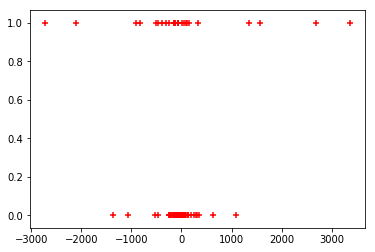

In [60]:
plt.scatter(recession_data.YIELD,recession_data.RECESSION,marker='+',color='red')

**Step 5:** Print the shape of dataset

In [61]:
recession_data.shape

(167, 2)

**Step 6:** Split 80% of the data to the training set and 20% of the data to the test set

In [0]:
X_train, X_test, y_train, y_test = train_test_split(recession_data[['YIELD']], recession_data.RECESSION, test_size=0.2, random_state=0)

In [63]:
X_test

,YIELD
150,-29.51310
56,130.11490
123,332.13613
60,24.67589
100,11.61801
51,2691.17647
7,-2720.95238
5,-247.49419
86,636.04403
135,-4.93286


In [64]:
X_train

,YIELD
61,5.56452
44,-78.23865
24,26.45361
63,-33.49161
89,-141.62694
19,-140.79503
130,13.72889
148,-28.03470
138,-41.80521
16,-121.50936


**Step 7:** Train the Logistic Regression model

In [65]:
#Create object of LogisticRegression class
lgr = LogisticRegression()
lgr.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

**Step 8:** Calculate predicted values 

In [66]:
y_pred = lgr.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## **PART D**

## **Performance Evaluation and Visualization of the model**

**Calculate accuracy score of the model**

In [67]:
print(accuracy_score(y_test,y_pred))

0.8529411764705882


**Print the Confusion matrix**

In [68]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n')
print(confusion)

Confusion Matrix:

[[28  0]
 [ 5  1]]


**Plot the Confusion Matrix**

In [0]:
#Python function to plot the Confusion Matrix
def plot_confusion_matrix(confusion, title='Confusion matrix', cmap='Pastel1'):
    plt.figure(figsize=(9,9))
    plt.imshow(confusion, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 15)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ["0", "1"], rotation=45, size = 10)
    plt.yticks(tick_marks, ["0", "1"], size = 10)
    plt.tight_layout()
    plt.ylabel('Actual label', size = 15)
    plt.xlabel('Predicted label', size = 15)
    width, height = confusion.shape

    for x in np.arange(width):
        for y in np.arange(height):
            plt.annotate(str(confusion[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')

<Figure size 432x288 with 0 Axes>

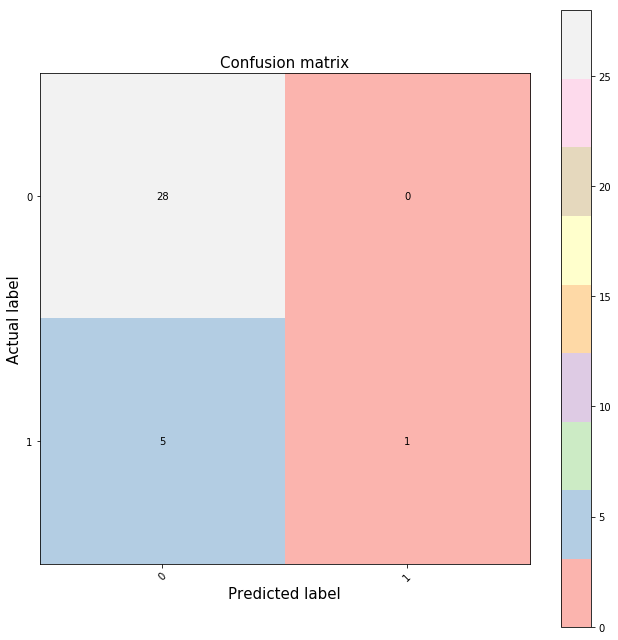

In [70]:
plt.figure()
plot_confusion_matrix(confusion);
plt.show();

In [0]:
cm_normalized = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis]

**Plot the Heat Map**

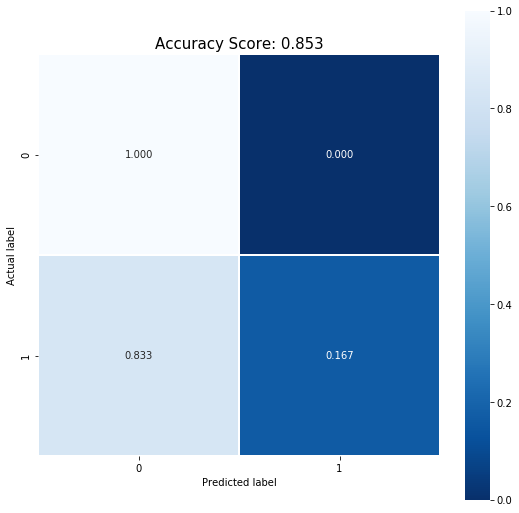

In [72]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_normalized, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.3f}'.format(accuracy_score(y_test,y_pred)) 
plt.title(all_sample_title, size = 15);

## **References**

https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/Logistic_Regression/LogisticRegression_toy_digits.ipynb


https://www.youtube.com/watch?v=zM4VZR0px8E


https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f


https://github.com/HariniGB/MachineLearning/tree/master/LogisticRegression






